In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.signal import butter, filtfilt, find_peaks
import matplotlib.pyplot as plt
import numpy as np
import time
from plotly.subplots import make_subplots

In [2]:
name = "20-04-2022_101153.txt"
df = pd.read_table(name)
df

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,200,1650449513,519.720,34.404,770.796,25.609760,1.829268,-37.073170,-475,-144,-568,0.965716,0.020020,-0.258827,-0.000244
1,5,200,1650449513,490.440,40.260,796.416,47.195120,15.121950,-27.682930,-475,-144,-568,0.960135,0.026246,-0.278298,-0.001465
2,5,200,1650449513,508.740,66.612,789.828,51.463420,7.682927,-40.731710,-475,-150,-571,0.957737,0.036042,-0.285348,-0.004151
3,5,200,1650449513,591.456,103.212,879.132,57.439030,-3.292683,-44.146340,-475,-150,-571,0.956503,0.039338,-0.289010,-0.005158
4,5,200,1650449513,485.316,109.068,824.964,57.804880,-9.756098,-43.902440,-476,-153,-573,0.956907,0.050142,-0.285897,-0.008759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113,5,200,1650449543,600.240,98.820,856.440,8.414635,17.926830,3.292683,-482,-120,-599,0.931125,0.106876,-0.334910,0.097049
6114,5,200,1650449543,575.352,119.316,890.844,12.073170,24.756100,6.341464,-482,-120,-599,0.931359,0.107395,-0.333933,0.097598
6115,5,200,1650449543,620.736,76.860,909.144,16.829270,31.951220,9.634147,-480,-120,-600,0.931573,0.107852,-0.333018,0.098178
6116,5,200,1650449543,622.932,107.604,879.132,21.585370,41.829270,11.341460,-480,-120,-600,0.931988,0.108676,-0.331248,0.099307


In [3]:
df["Tempo"] = pd.to_datetime(pd.to_numeric(df["Timestamp"]),unit="s")

In [7]:
file = "..\\..\\DATA\\center_sternum.txt"
df2 = pd.read_table(file)

In [5]:
df2["Tempo"] = df2.index/200

In [6]:
fig = px.line(df2[(df2["Tempo"]>10)&(df2["Tempo"]<70)], x = "Tempo", y = "AccZ")
fig.show()

In [7]:
df2["AccZCorr"] = df2.AccZ.rolling(15).mean()
fig2 = px.line(df2[(df2["Tempo"]>10)&(df2["Tempo"]<14)], x = "Tempo", y = "AccZCorr")
fig2.show()

In [8]:
sos = butter(4, 2, "low",fs = 200)
result = filtfilt(b=sos[0],a=sos[1],x=df2[(df2["Tempo"]>9)&(df2["Tempo"]<70)]["GyroX"])
fig =px.line(df2[(df2["Tempo"]>9)&(df2["Tempo"]<70)].reset_index()["GyroX"], color_discrete_map= dict(color=0, opacity = 0))
fig.add_traces(list(px.line(pd.DataFrame(result, columns = ["Filtrato"])).select_traces()))

C:\Users\Alberto\AppData\Local\Temp/ipykernel_6908/2539166516.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



69.98250437390652

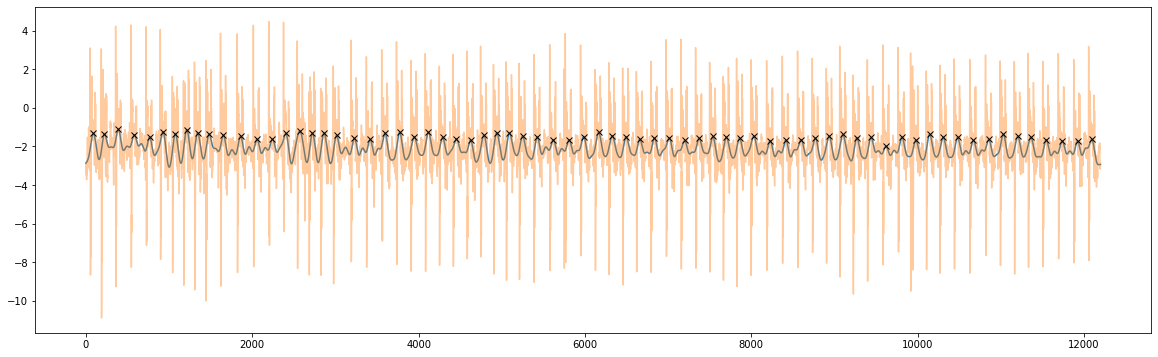

In [9]:
fig = plt.figure(figsize=(20,6))
plt.plot(result)
plt.plot(df2[(df2["Tempo"]>9)&(df2["Tempo"]<70)].reset_index()["GyroX"], alpha = 0.4)
picchi,_ = find_peaks(result, -2, distance = 100)
plt.plot(picchi,result[picchi], "x", color = "k")
fig.show()
200/(picchi[1:len(picchi)]-picchi[0:len(picchi)-1]).mean()*60

-Lunghezza buffer
-campionare i buffer
-calcolare bpm
-far vedere output
-tecnica per capire se c'è o non cìè battito

In [10]:
def battito():
    picchi,_ = find_peaks(result, -2, distance = 100)
    return(picchi[1:len(picchi)]-picchi[0:len(picchi)-1]).mean()/200*60
def fiter(dato):
    sos = butter(4, 2, "low",fs = 200)
    result = filtfilt(b=sos[0],a=sos[1],x=dato)
    return result

In [36]:
import plotly.express as px
import plotly.graph_objects as go
from scipy.signal import butter, filtfilt, find_peaks
from os import system
from IPython.display import clear_output
import numpy as np
from time import sleep
class Buffer:
    __MAX_LENGHT = 1000
    __MIN_LENGHT = 200
    __LENGHT_MESURE = 30

    def __init__(self, freq = 100):
        self.buffer = []
        self._freq = freq
        self.beat_buffer = []
        self.lastbeat = 0
        __MAX_LENGHT = freq*10
        __MIN_LENGHT = freq*2


    def add_dato(self,dato):
        self.buffer.append(dato)
        if(len(self.buffer) > self.__MAX_LENGHT):
            self.buffer.pop(0)
    
    def fiter(self):
        sos = butter(3, [0.7,3.5], "bandpass",fs = self._freq)
        result = filtfilt(b=sos[0],a=sos[1],x=self.buffer)
        return result

    def __str__(self):
        return f"{self.buffer}"

    def check(self):
        if len(self.buffer) >= self.__MIN_LENGHT:
            result = self.fiter()
            lista = [abs(elem) for elem in result]
            if np.mean(lista) >520 or np.mean(lista) <40:
                self.buffer = []
            return result

    def battito(self, numerose = True, videose=False, unfiltered = False):
        filtrato = self.check()
        if len(self.buffer) >= self.__MAX_LENGHT/4:
            picchi,_ = find_peaks(filtrato, -20, distance = 40)
            self.beat_buffer.append(self._freq/(picchi[1:len(picchi)]-picchi[0:len(picchi)-1]).mean()*60)
            if len(self.beat_buffer)> self.__LENGHT_MESURE:
                self.beat_buffer.pop(0)
            if numerose:
                if self.lastbeat == 0:
                    self.__c =0
                    self.lastbeat = int(sum(self.beat_buffer)/len(self.beat_buffer))
                    print(self.lastbeat)
                else:
                    beat = int(sum(self.beat_buffer)/len(self.beat_buffer))
                    self.__c += 1
                    if beat != self.lastbeat and self.__c % 20 == 0:
                        clear_output()
                        self.lastbeat = beat
                        print(self.lastbeat)
            if videose and unfiltered:
                return filtrato, self.buffer

            if videose:
                 return filtrato
                
            if unfiltered:
                
                return self.buffer

    def lastmesure(self):
        print(int(f"{np.mean(self.beat_buffer):.0f}"))
        return np.array(self.beat_buffer)

    def schermo(self):
        fig = go.FigureWidget()
        fig.add_scatter()
        fig
        return fig

In [ ]:
file = "..\\..\\DATA\\Marcato04-05-2022.txt"
df3 = pd.read_table(file)

In [ ]:
df3

,Timestamp,Acc.X,Acc.Y,Acc.Z,Gyro.X,Gyro.Y,Gyro.Z,Magn.X,Magn.Y,Magn.Z,...,P.9,P.10,P.11,P.12,P.13,P.14,P.15,PPG_RED.,PPG_IR.,PPG_GREEN.
0,1644926150016,-28.304,0.000,991.616,3.36,0.00,0.00,439.5,-196.5,-693.0,...,0,0,0,0,0,0,0,0,954,0
1,1644926150026,-23.912,4.880,1007.720,5.39,-6.09,4.41,-99.0,33.0,-766.5,...,0,0,0,0,0,0,0,968,929,0
2,1644926150036,-19.520,3.904,1002.352,13.72,-22.54,2.31,-100.5,40.5,-763.5,...,0,0,0,0,0,0,0,961,931,0
3,1644926150046,-14.152,-6.832,1016.504,4.34,-7.98,1.19,-102.0,42.0,-763.5,...,0,0,0,0,0,0,0,960,929,0
4,1644926150056,-5.368,-6.344,1018.456,0.00,-1.12,0.07,-100.5,34.5,-760.5,...,0,0,0,0,0,0,0,951,922,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,1644926175190,-16.592,-5.368,1017.480,0.00,-0.98,0.07,-82.5,37.5,-768.0,...,0,0,0,0,0,0,0,151431,178957,0
2516,1644926175200,-10.736,2.440,1012.112,0.00,-0.91,0.00,-79.5,42.0,-772.5,...,0,0,0,0,0,0,0,151431,178926,0
2517,1644926175210,-16.104,0.976,1012.600,0.00,-0.98,0.07,-79.5,37.5,-768.0,...,0,0,0,0,0,0,0,151479,178913,0
2518,1644926175220,-22.448,0.000,1010.648,-0.14,-0.91,0.00,-78.0,37.5,-768.0,...,0,0,0,0,0,0,0,151509,178928,0


In [ ]:
fig = make_subplots(specs = [[{'secondary_y':True}]])

fig.add_trace(go.Scatter(x = df3.index, y = df3["PPG_RED."], name = "Red"), secondary_y=False)
fig.add_trace(go.Scatter(x = df3.index, y = df3["PPG_IR."], name = "Ir"), secondary_y=True)
fig.show()

In [3]:
file = "..\\..\\DATA\\Ostanello04-05-2022.txt"
df4 = pd.read_table(file)
df4

,Timestamp,Acc.X,Acc.Y,Acc.Z,Gyro.X,Gyro.Y,Gyro.Z,Magn.X,Magn.Y,Magn.Z,...,P.9,P.10,P.11,P.12,P.13,P.14,P.15,PPG_RED.,PPG_IR.,PPG_GREEN.
0,1651657469075,-35.624,12.688,986.736,3.36,0.00,0.00,231.0,-168.0,-399.0,...,0,0,0,0,0,0,0,1092,884,0
1,1651657469085,-21.960,9.272,1014.064,5.53,-5.46,1.68,-307.5,61.5,-483.0,...,0,0,0,0,0,0,0,1089,892,0
2,1651657469095,-26.352,7.808,1005.768,14.21,-26.18,-0.35,-306.0,61.5,-481.5,...,0,0,0,0,0,0,0,1073,885,0
3,1651657469105,-40.016,-7.320,1008.208,4.55,-7.00,-7.77,-304.5,66.0,-483.0,...,0,0,0,0,0,0,0,1074,892,0
4,1651657469115,-33.672,-10.736,1006.256,0.07,-0.14,-6.23,-304.5,66.0,-477.0,...,0,0,0,0,0,0,0,1082,885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10579,1651657574968,-24.888,-4.392,1018.456,0.00,-0.98,0.07,-298.5,60.0,-496.5,...,0,0,0,0,0,0,0,161842,200253,0
10580,1651657574978,-26.840,-10.248,1014.552,0.00,-0.98,0.14,-304.5,57.0,-496.5,...,0,0,0,0,0,0,0,161870,200271,0
10581,1651657574988,-19.520,2.440,1026.752,0.21,-0.98,0.21,-303.0,57.0,-492.0,...,0,0,0,0,0,0,0,161830,200253,0
10582,1651657574998,-24.888,-8.784,1012.112,-0.21,-1.19,0.56,-304.5,58.5,-490.5,...,0,0,0,0,0,0,0,161802,200233,0


In [41]:
bufferost = Buffer()
fig = go.FigureWidget()
fig.add_scatter()
fig.add_scatter()
fig

FigureWidget({
    'data': [{'type': 'scatter', 'uid': 'eca3dd0c-07cb-40c7-a79f-0d766ee40b11'},
             {…

In [42]:
for j in range(len(df4["PPG_IR."])):
    bufferost.add_dato(df4.iloc[j]["PPG_IR."])
    sleep(1/100)
    #buffer2.check()
    #if j>15:
    #    fig.data[0].y = buffer2.fiter()
    try:
        filt = bufferost.battito(videose=True)
        if len(filt) >= 950: 
            fig.data[0].y = filt[150:900]
    except:
        pass

75


KeyboardInterrupt: 

In [ ]:
fig = make_subplots(specs = [[{'secondary_y':True}]])

fig.add_trace(go.Scatter(x = df4.index, y = df4["PPG_RED."], name = "Red"), secondary_y=False)
fig.add_trace(go.Scatter(x = df4.index, y = df4["PPG_IR."], name = "Ir"), secondary_y=True)
fig.show()

In [ ]:
sos = butter(3, [0.7,3.5], "bandpass",fs = 100)

result1 = filtfilt(b=sos[0],a=sos[1],x=df4["PPG_IR."])
#result2 = filtfilt(b=sos[0],a=sos[1],x=df4["PPG_RED."])
result = result1#+result2
result = result[8000:]
result3 = filtfilt(b=sos[0],a=sos[1],x=df4["PPG_RED."])
result4 = filtfilt(b=sos[0],a=sos[1],x=df4["PPG_RED."])
picchi,_ = find_peaks(result, 0, distance = 40)
print(100/(picchi[1:len(picchi)]-picchi[0:len(picchi)-1]).mean()*60)

77.76904948939513


In [ ]:
px.line(x = df4.index[8000:], y = result)
fig = make_subplots(specs = [[{'secondary_y':True}]])

fig.add_trace(go.Scatter(y = result, name = "filt"), secondary_y=False)
fig.add_trace(go.Scatter(y = df4["PPG_IR."][8000:], name = "Ir"), secondary_y=True)
fig.add_trace(go.Scatter(x = picchi, y = result[picchi],mode = "markers", marker_line_width=2, marker_size=3))
#fig.add_trace(go.Scatter(x = df4.index[8000:10000], y = df4["PPG_IR."][8000:10000], name = "Ir"), secondary_y=True)
fig.show()


In [ ]:
file = "..\\..\\DATA\\Ostanello04-05-2022.txt"
df5 = pd.read_table(file)
df5

,Timestamp,Acc.X,Acc.Y,Acc.Z,Gyro.X,Gyro.Y,Gyro.Z,Magn.X,Magn.Y,Magn.Z,...,P.9,P.10,P.11,P.12,P.13,P.14,P.15,PPG_RED.,PPG_IR.,PPG_GREEN.
0,1651657469075,-35.624,12.688,986.736,3.36,0.00,0.00,231.0,-168.0,-399.0,...,0,0,0,0,0,0,0,1092,884,0
1,1651657469085,-21.960,9.272,1014.064,5.53,-5.46,1.68,-307.5,61.5,-483.0,...,0,0,0,0,0,0,0,1089,892,0
2,1651657469095,-26.352,7.808,1005.768,14.21,-26.18,-0.35,-306.0,61.5,-481.5,...,0,0,0,0,0,0,0,1073,885,0
3,1651657469105,-40.016,-7.320,1008.208,4.55,-7.00,-7.77,-304.5,66.0,-483.0,...,0,0,0,0,0,0,0,1074,892,0
4,1651657469115,-33.672,-10.736,1006.256,0.07,-0.14,-6.23,-304.5,66.0,-477.0,...,0,0,0,0,0,0,0,1082,885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10579,1651657574968,-24.888,-4.392,1018.456,0.00,-0.98,0.07,-298.5,60.0,-496.5,...,0,0,0,0,0,0,0,161842,200253,0
10580,1651657574978,-26.840,-10.248,1014.552,0.00,-0.98,0.14,-304.5,57.0,-496.5,...,0,0,0,0,0,0,0,161870,200271,0
10581,1651657574988,-19.520,2.440,1026.752,0.21,-0.98,0.21,-303.0,57.0,-492.0,...,0,0,0,0,0,0,0,161830,200253,0
10582,1651657574998,-24.888,-8.784,1012.112,-0.21,-1.19,0.56,-304.5,58.5,-490.5,...,0,0,0,0,0,0,0,161802,200233,0


In [ ]:
sos = butter(3, [0.7,3.5], "bandpass",fs = 100)

result1 = filtfilt(b=sos[0],a=sos[1],x=df5["PPG_IR."])
#result2 = filtfilt(b=sos[0],a=sos[1],x=df5["PPG_RED."])
result = result1#+result2
result = result[8000:]
result3 = filtfilt(b=sos[0],a=sos[1],x=df5["PPG_RED."])
result4 = filtfilt(b=sos[0],a=sos[1],x=df5["PPG_RED."])
picchi,_ = find_peaks(result, 0, distance = 40)
print(100/(picchi[1:len(picchi)]-picchi[0:len(picchi)-1]).mean()*60)

77.76904948939513


In [ ]:
px.line(x = df5.index, y = result)
fig = make_subplots(specs = [[{'secondary_y':True}]])

fig.add_trace(go.Scatter(y = result, name = "filt"), secondary_y=False)
fig.add_trace(go.Scatter(y = df5["PPG_IR."], name = "Ir"), secondary_y=True)
fig.add_trace(go.Scatter(x = picchi, y = result[picchi],mode = "markers", marker_line_width=2, marker_size=3))
#fig.add_trace(go.Scatter(x = df4.index[8000:10000], y = df4["PPG_IR."][8000:10000], name = "Ir"), secondary_y=True)
fig.show()